In [2]:
import pandas as pd
import random
import sklearn.decomposition as dp
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [5]:
vol=pd.read_excel('波动率2021.xlsx')
vol.dropna(axis=0,inplace=True)
vol.set_index("证券代码")

tier1=pd.read_excel('industries_clustering_1_tier_classification_silhouette_score.xlsx')
tier1_vol=vol.merge(tier1,on=['证券代码','证券简称'])
tier1_vol.set_index("证券代码")

n=len(tier1_vol)
industry=[]
for i in range(n-2):
    industry.append(tier1_vol.iloc[i,13])

,证券简称,2101,2102,2103,2104,2105,2106,2107,2108,2109,business,words,industry
证券代码,,,,,,,,,,,,,
000001.SZ,平安银行,3.1943,3.6900,2.9436,2.0854,1.7454,1.7836,2.7768,2.5768,2.9402,利息收入发放贷款及垫款个人贷款业务利息收入发放贷款及垫款公司贷款业务非利息收入手续费及佣金收...,"['利息', '收入', '发放', '贷款', '及', '垫款', '个人', '贷款'...",3
000002.SZ,万科A,2.0391,2.8738,2.0595,1.2521,1.2134,0.9710,2.7647,2.7610,3.0689,房地产开发与经营业房地产管理业及其他,"['房地产', '开发', '与', '经营业房地产管理业', '及', '其他']",14
000004.SZ,国华网安,3.5411,3.4833,1.8256,3.3435,1.9555,5.8723,5.5114,3.3007,3.1690,安全加固检测类安全系统平台类集成产品及定制开发类创世神曲,"['安全', '加固', '检测', '类', '安全', '系统', '平台类', '集成...",18
000005.SZ,ST星源,1.8226,3.7278,4.2619,1.3192,3.0835,2.0852,2.9724,2.1412,2.2525,环保业务收入酒店经营物业管理收入,"['环保', '业务', '收入', '酒店', '经营', '物业管理', '收入']",8
000006.SZ,深振业A,1.8816,2.2138,1.7248,1.1815,1.0114,0.5892,1.0761,1.1934,1.6550,房产销售业务租赁业务代建服务,"['房产', '销售', '业务', '租赁', '业务', '代建', '服务']",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
688777.SH,中控技术,3.0088,2.6911,3.2606,2.6471,4.0160,2.6330,2.7673,4.3979,1.8668,控制系统控制系统仪表自动化仪表控制系统软件其他工业软件及服务,"['控制系统', '控制系统', '仪表', '自动化', '仪表', '控制系统', '软...",23
688788.SH,科思科技,4.0062,3.5766,2.1023,2.9591,2.4966,3.2475,4.2436,3.5622,2.8945,指挥控制信息处理设备其他信息处理终端及专用模块等软件雷达信息处理设备,"['指挥', '控制', '信息处理', '设备', '其他', '信息处理', '终端',...",4
688819.SH,天能股份,16.1125,3.2661,2.7263,2.2545,1.9118,2.3166,5.5058,4.7363,2.1048,铅酸电池锂电池等其他电池,"['铅酸电池锂电池', '等', '其他', '电池']",22


In [8]:
vol_tsne=tier1_vol.filter(regex="21")

In [9]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,random_state=0)

In [10]:
vol_2d=tsne.fit_transform(vol_tsne)

In [11]:
target_ids=range(n)
tsne1=[]
tsne2=[]
for i in range(n):
    tsne1.append(vol_2d[i][0])
    tsne2.append(vol_2d[i][1])

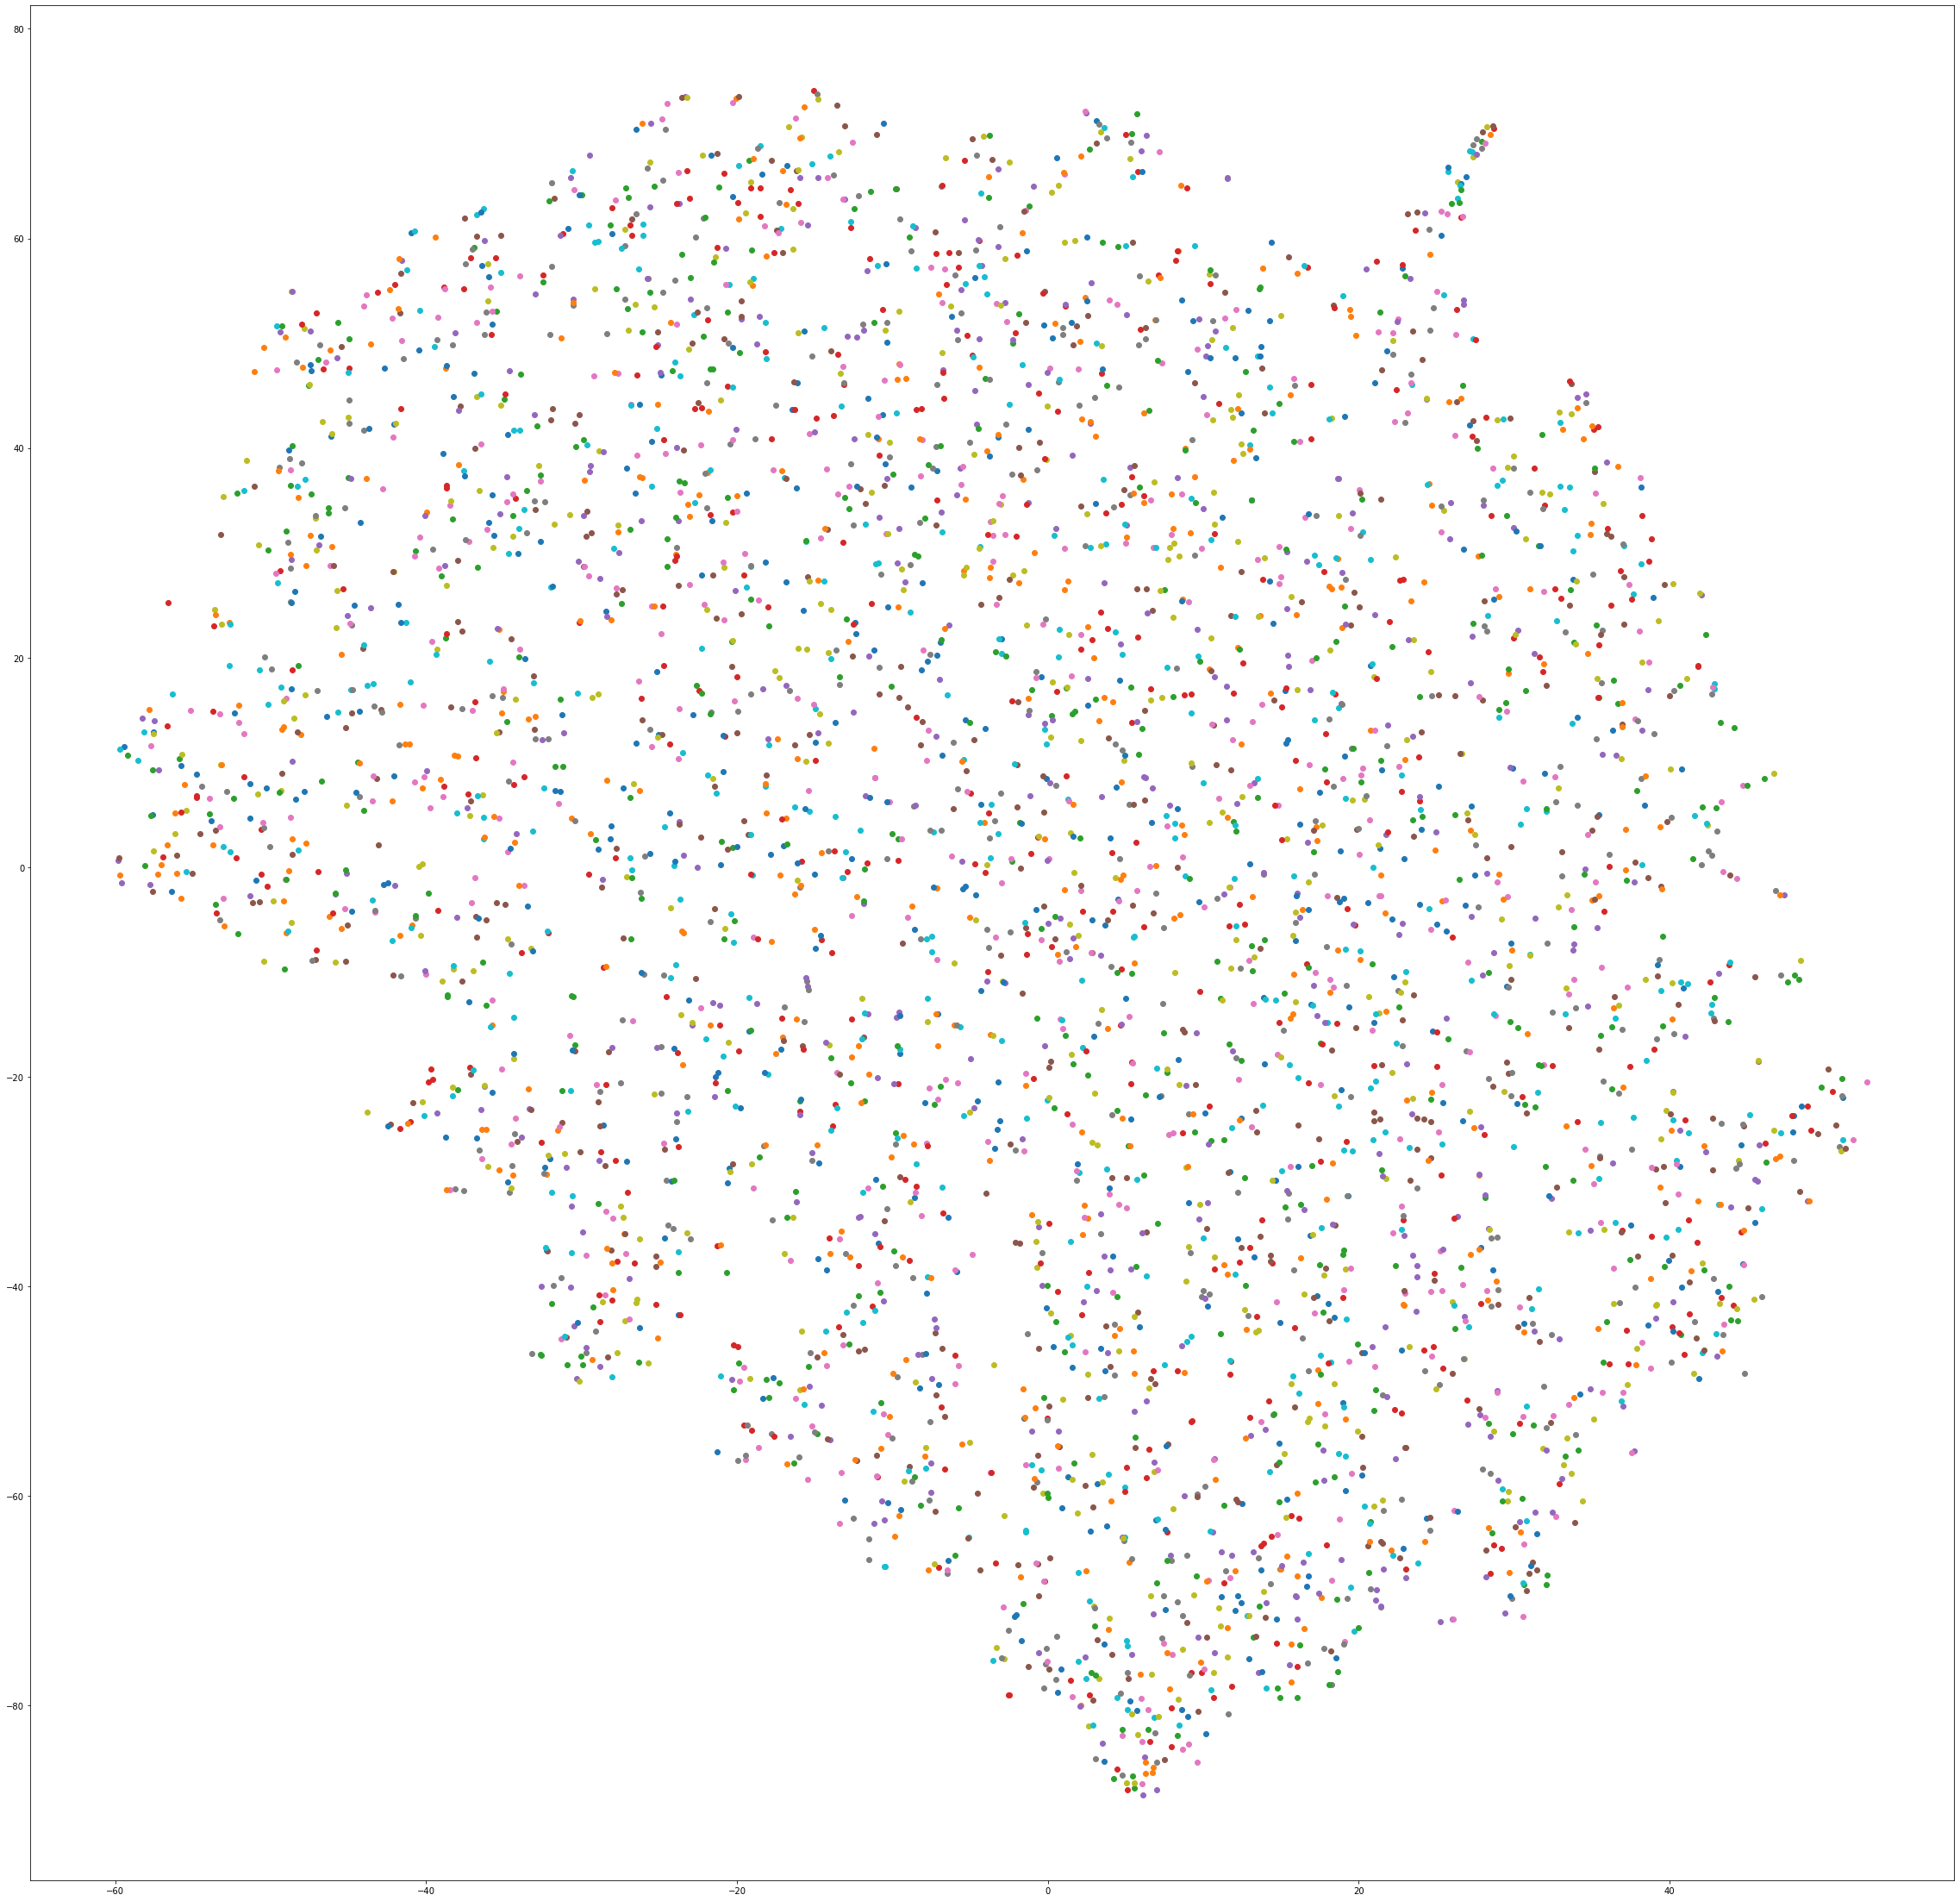

In [13]:
plt.figure(figsize=(40,40))
for x,y,z in zip(tsne1,tsne2,industry):
    plt.scatter(x,y,label=z)
plt.legend
plt.show()

In [14]:
pca=dp.PCA(n_components=2)
pca_vol=pca.fit_transform(vol_tsne)
pc1=[]
pc2=[]
for i in range(n):
    pc1.append(pca_vol[i][0])
    pc2.append(pca_vol[i][1])

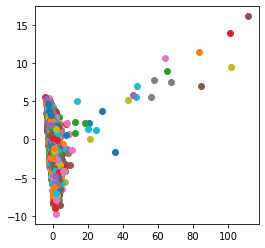

In [16]:
plt.figure(figsize=(4,4))
for x,y,z in zip(pc1,pc2,industry):
    plt.scatter(x,y,label=z)
plt.legend
plt.show()